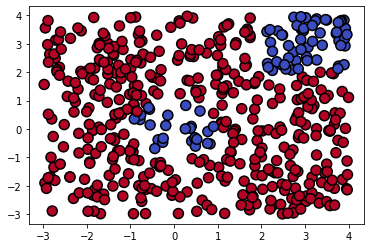

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=6, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_97138/2774520593.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
/var/folders/ww/67t1k6ss6bqfd8tw6ntmpfgm0000gn/T/ipykernel_97138/2774520593.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')


Text(0.5, 1.0, 'Deep Random Forest')

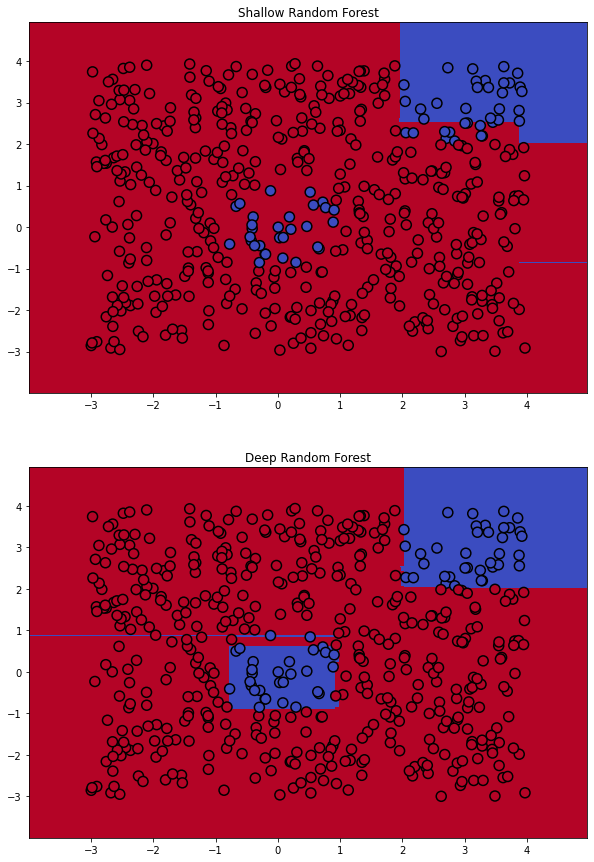

In [2]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [5]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
dataset.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [137]:
newdf = dataset.copy()
newdf['spam'] = newdf['yesno'].apply(lambda x: 1 if x=='y' else 0)
newdf = newdf.drop(['Unnamed: 0','yesno'], axis=1)
newdf

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


In [138]:
def permutate(data):
    dataframe = data.copy()
    columns = list(data.columns)
    for col in data:
        columns.pop(0)
        for row in columns:
            dataframe[f'{col}_{row}'] = data[col] * data[row]
    return dataframe

df = permutate(newdf.drop('spam', axis=1))

In [140]:
X = df.copy()
y = newdf['spam']
X,y

(      crl.tot  dollar   bang  money  n000  make  crl.tot_dollar  crl.tot_bang  \
 0         278   0.000  0.778   0.00  0.00  0.00           0.000       216.284   
 1        1028   0.180  0.372   0.43  0.43  0.21         185.040       382.416   
 2        2259   0.184  0.276   0.06  1.16  0.06         415.656       623.484   
 3         191   0.000  0.137   0.00  0.00  0.00           0.000        26.167   
 4         191   0.000  0.135   0.00  0.00  0.00           0.000        25.785   
 ...       ...     ...    ...    ...   ...   ...             ...           ...   
 4596       88   0.000  0.000   0.00  0.00  0.31           0.000         0.000   
 4597       14   0.000  0.353   0.00  0.00  0.00           0.000         4.942   
 4598      118   0.000  0.000   0.00  0.00  0.30           0.000         0.000   
 4599       78   0.000  0.000   0.00  0.00  0.96           0.000         0.000   
 4600       40   0.000  0.125   0.00  0.00  0.00           0.000         5.000   
 
       crl.tot

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8653637350705755

In [143]:
data = pd.DataFrame([model.feature_importances_], columns=X_train.columns)
swaped = data.swapaxes('index', 'columns')
swaped.columns = ['vals']
swaped.sort_values(by=['vals'], inplace=True)
swaped.reset_index()

,index,vals
0,money_make,0.000000
1,money_n000,0.000027
2,n000_make,0.000661
3,make,0.001166
4,bang_n000,0.001176
5,crl.tot_n000,0.001366
6,dollar_make,0.001694
7,bang_make,0.001965
8,dollar_n000,0.003422
9,money,0.006090


In [144]:
data

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,0.029716,0.14077,0.042572,0.00609,0.024777,0.001166,0.008679,0.614877,0.040245,0.001366,...,0.060567,0.007222,0.003422,0.001694,0.006469,0.001176,0.001965,0.000027,0.0,0.000661


<AxesSubplot:>

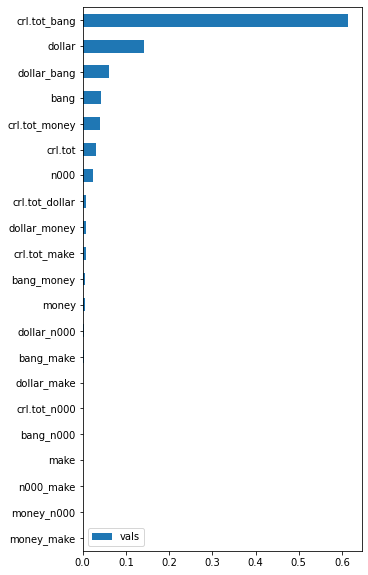

In [148]:
swaped.plot(kind='barh', figsize=(5, 10))

In [149]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(model, param_grid={'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}, estimator=GradientBoostingClassifier(random_state=42), scoring='accuracy', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
gridsearch.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250,
                           random_state=42)

In [160]:
len(gridsearch.cv_results_['params'])

48

In [159]:
gridsearch.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'deviance',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__presort': 'deprecated',
 'estimator__random_state': 42,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingClassifier(random_state=42),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
  'n_estimators': [100, 250, 500, 750, 1000, 12

In [156]:
pred_params = gridsearch.best_estimator_.get_params()
gridsearch.best_score_

0.8836956521739131

In [169]:
gds = GridSearchCV(model, param_grid={'max_depth':range(5,16)}, estimator=GradientBoostingClassifier(random_state=42), scoring='accuracy', n_jobs=-1, cv=5)
gds.fit(X_train, y_train)
gds.best_estimator_

GradientBoostingClassifier(max_depth=5, random_state=42)

In [190]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = np.dot(incorrect,sample_weight)
        
        # Вычисляем вес нового алгоритма
        estimator_weight = np.log((1 - estimator_error) / estimator_error)*learning_rate

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())

    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    X_meta_train = np.zeros_like(y_train, dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)[:, 1]
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)[:, 1]
    
    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.vstack([
        features_train for features_train, features_test in features
    ]).T

    stacked_features_test = np.vstack([
        features_test for features_train, features_test in features
    ]).T
    
    return stacked_features_train, stacked_features_test


In [4]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

In [5]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    
    X_meta_tests_array = []
    splits = 0
    for train_fold_index, predict_fold_index in cv.split(X_train):
        n_classes = len(np.unique(y_test))
        X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
        splits += 1
        
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_tests_array.append(folded_clf.predict_proba(X_test))

    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = sum(X_meta_tests_array) / splits

    return X_meta_train, X_meta_test



In [35]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    # splits = cv.split(X_train) # for KFold
    splits = cv.split(X_train, y_train) # for StratifiedKFold
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [7]:
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

In [9]:
#Подгрузка датасета и разбивка
cv = KFold(n_splits=10, shuffle=True, random_state=42)

dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#Создание новых признаков из предсказаний модели (стекинг)
classifiers = [LogisticRegression(penalty='l1', C=0.001, solver='saga', random_state=42, max_iter=2000,
                                 multi_class='ovr'), 
               LogisticRegression(penalty='l2', C=0.001, solver='saga', random_state=42, max_iter=2000,
                                 multi_class='multinomial'),
              RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              GradientBoostingClassifier(n_estimators=200, random_state=42)]

stacked_features_train, stacked_features_test = generate_meta_features(
                                                    classifiers, X_train, X_test, y_train, cv
                                                    )

#f1 на НЕнормированных данных
def compute_metric(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')

compute_metric(clf, X_train=stacked_features_train, y_train=y_train, 
               X_test=stacked_features_test, y_test=y_test
              )

100%|██████████| 4/4 [02:29<00:00, 37.50s/it]


0.978797

In [11]:
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1), 
              ExtraTreesClassifier(n_estimators=200, random_state=42)]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 2/2 [00:10<00:00,  5.32s/it]


0.982421

In [32]:
classifiers = [KNeighborsClassifier(n_neighbors=3)]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


0.987201

In [33]:
classifiers = [LogisticRegression(penalty='l1', C=0.001, solver='saga', random_state=42, max_iter=2000, multi_class='ovr'), 
               KNeighborsClassifier(n_neighbors=3),
              RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              AdaBoostClassifier()]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 4/4 [00:36<00:00,  9.21s/it]


0.987277

In [36]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              ExtraTreesClassifier(n_estimators=300, random_state=42)]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 2/2 [00:13<00:00,  6.81s/it]


0.983918

In [37]:
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              ExtraTreesClassifier(n_estimators=300, random_state=42)]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 2/2 [00:24<00:00, 12.46s/it]


0.984228

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              RandomForestClassifier()]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none')
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 2/2 [00:05<00:00,  2.61s/it]


0.975745

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              GradientBoostingClassifier(n_estimators=200, random_state=42)]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none', max_iter=2000)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifiers = [RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
              KNeighborsClassifier()]

stacked_features_train, stacked_features_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)
clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, penalty='none', max_iter=2000)
compute_metric(clf, X_train=stacked_features_train, y_train=y_train, X_test=stacked_features_test, y_test=y_test)

100%|██████████| 2/2 [00:03<00:00,  1.93s/it]


0.992448

In [ ]:
# Электричество: 1183-908=275*295=81125 сум
# Газ: 15.702-8.019=7.683*380=2919 сум
# Хол.вода: (5+51)-(4+40)=12*400=4800 сум
# Гор.вода: (11+30)-(10+25)=6*5242=5217 сум

# Итого: ~94000 сум